In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta
import requests
import io
proxy_dict = {
    'http': "http://J0438567@10.16.152.74:8080",
    'https': "http://J0438567@10.16.152.74:8080"
}

In [3]:
url = "https://www.data.gouv.fr/fr/datasets/r/dd0de5d9-b5a5-4503-930a-7b08dc0adc7c"
req = requests.get(url, proxies=proxy_dict).text
df_raw = pd.read_csv(io.StringIO(req), sep=';', parse_dates=['jour'], index_col='jour')
df_raw = df_raw[df_raw['cl_age90'] == 0].drop(['cl_age90'], axis=1)
df_raw['pos_semaine'] = df_raw.index.weekday
if df_raw['pos_semaine'].iloc[-1] < 5:
    df = df_raw[df_raw['pos_semaine']<5].resample('W').mean()
else:
    df = df_raw.resample('W').mean()
df['I'] = df['P'] / df['T']
df.tail()

,P_f,P_h,P,T_f,T_h,T,pop,pos_semaine,I
jour,,,,,,,,,
2020-12-06,5850.428571,4493.000000,10383.285714,94118.285714,72059.714286,166647.285714,67114995.0,3.0,0.062307
2020-12-13,6350.428571,5067.857143,11459.428571,106328.428571,83437.857143,190298.714286,67114995.0,3.0,0.060218
2020-12-20,7800.142857,6268.000000,14112.714286,182767.571429,149170.142857,332875.285714,67114995.0,3.0,0.042396
2020-12-27,6501.428571,5278.285714,11812.428571,228369.857143,189559.714286,418900.000000,67114995.0,3.0,0.028199
2021-01-03,8529.166667,7052.333333,15619.833333,160130.500000,131018.833333,291693.833333,67114995.0,2.5,0.053549


<AxesSubplot:xlabel='jour'>

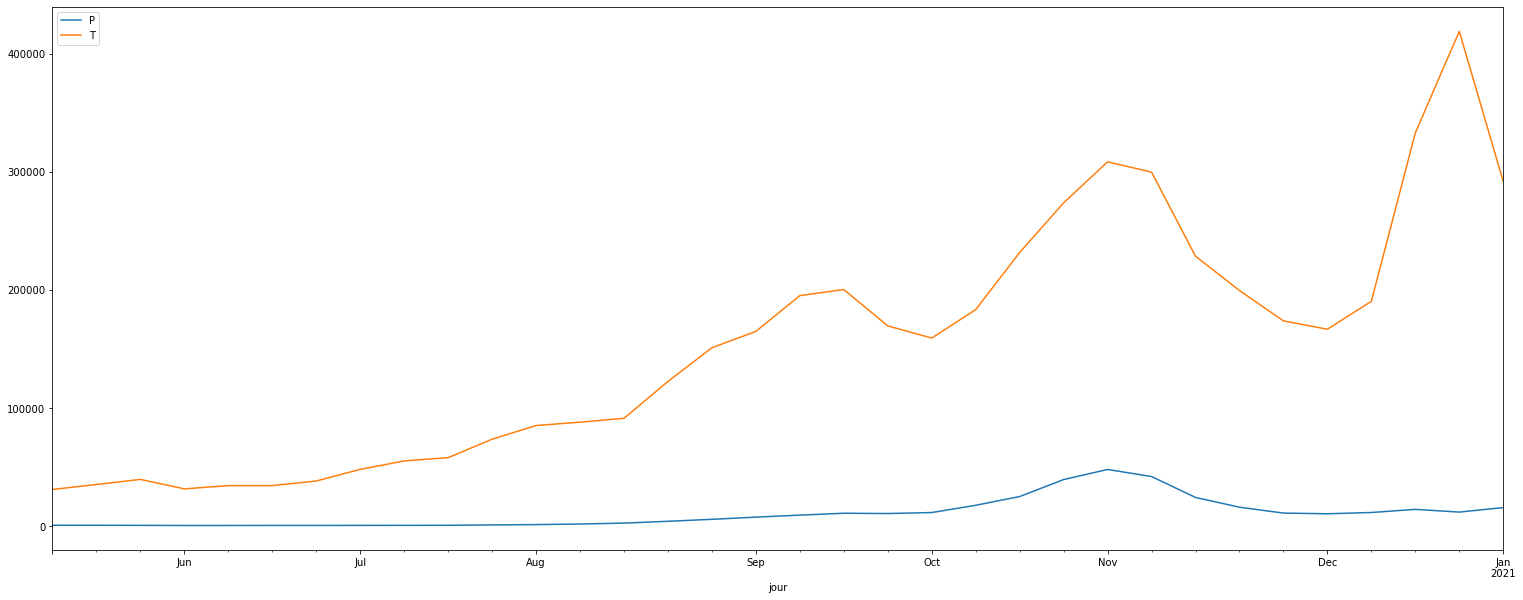

In [4]:
df.loc[:, ['P', 'T']].plot(figsize=(26, 10))

<AxesSubplot:xlabel='jour'>

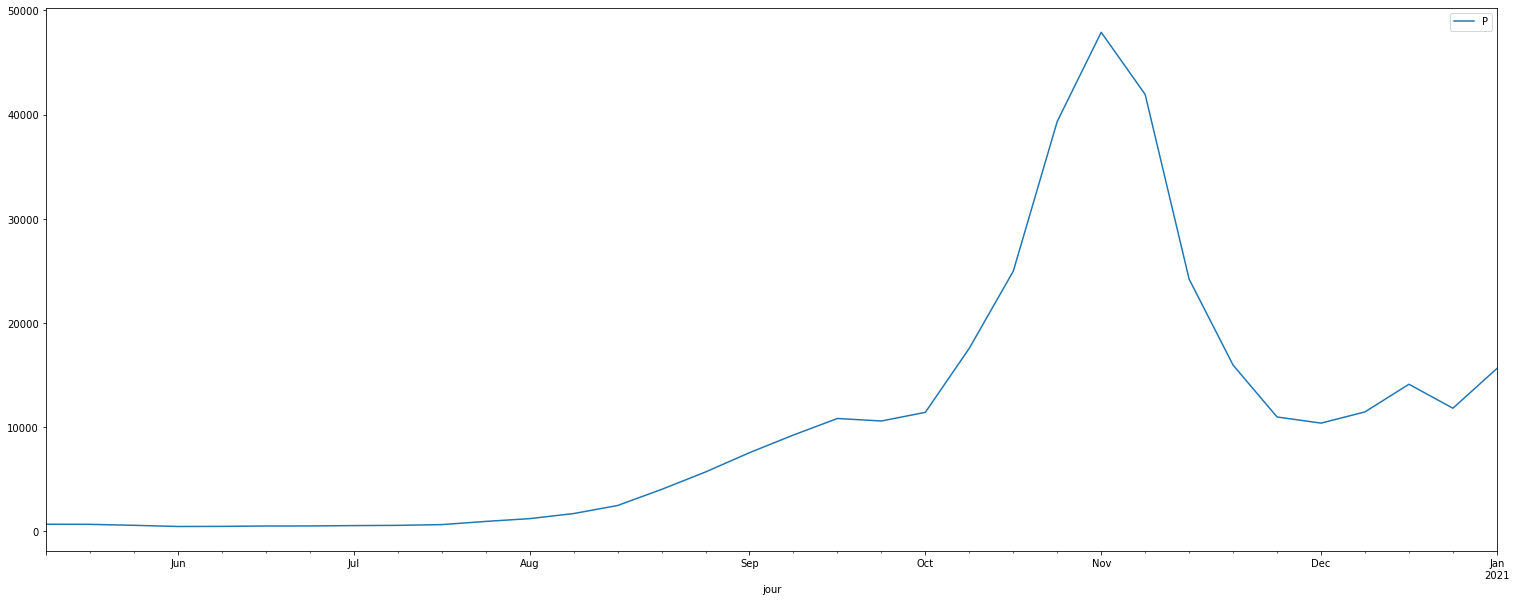

In [5]:
df.loc[:, ['P']].plot(figsize=(26, 10))

<AxesSubplot:xlabel='jour'>

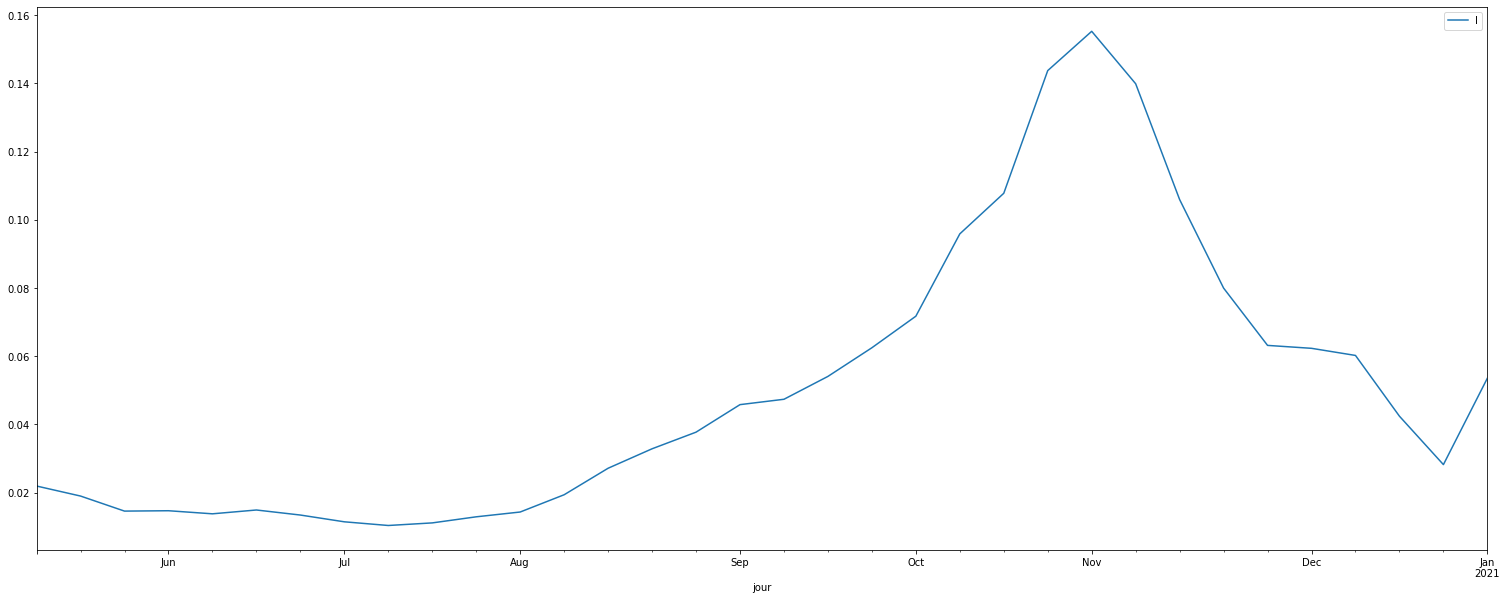

In [6]:
df.loc[:, ['I']].plot(figsize=(26, 10))